In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

## Loading Data

In [4]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['seg_train', 'seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  2%|▏         | 41/2271 [00:00<00:05, 405.56it/s]

Loading seg_train


 14%|█▍        | 67/474 [00:00<00:00, 663.44it/s]

Loading seg_test


100%|██████████| 510/510 [00:00<00:00, 775.98it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

## Explore the dataset

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


## scale the data

In [8]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

## Visualize the data

In [9]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()


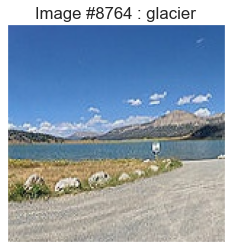

In [10]:
display_random_image(class_names, train_images, train_labels)


In [15]:
def display_examples(class_names, images, labels):
        
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

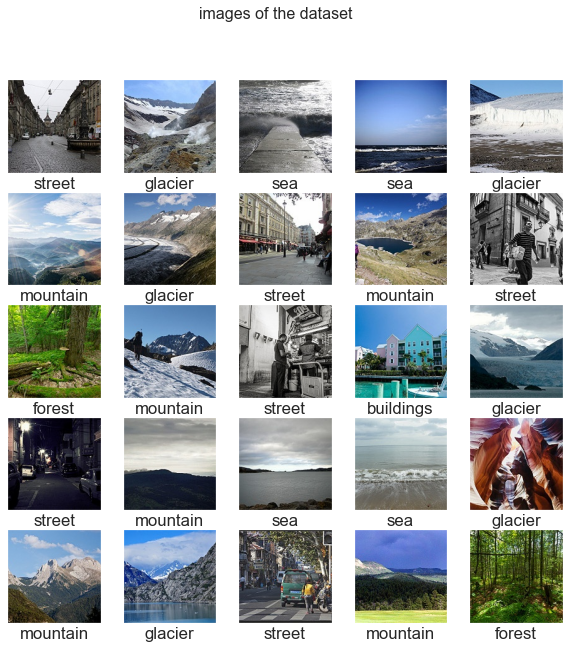

In [16]:
display_examples(class_names, train_images, train_labels)


## Building Model

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
88/88 [==============================] - 90s 1s/step - loss: 2.2686 - accuracy: 0.3784 - val_loss: 1.0023 - val_accuracy: 0.6145
Epoch 2/20
88/88 [==============================] - 90s 1s/step - loss: 0.8636 - accuracy: 0.6811 - val_loss: 0.7661 - val_accuracy: 0.7025
Epoch 3/20
88/88 [==============================] - 89s 1s/step - loss: 0.6352 - accuracy: 0.7690 - val_loss: 0.7142 - val_accuracy: 0.7506
Epoch 4/20
88/88 [==============================] - 89s 1s/step - loss: 0.5356 - accuracy: 0.8119 - val_loss: 0.6478 - val_accuracy: 0.7695
Epoch 5/20
88/88 [==============================] - 88s 1s/step - loss: 0.4098 - accuracy: 0.8654 - val_loss: 0.6834 - val_accuracy: 0.7585
Epoch 6/20
88/88 [==============================] - 90s 1s/step - loss: 0.3206 - accuracy: 0.8971 - val_loss: 0.7216 - val_accuracy: 0.7602
Epoch 7/20
88/88 [==============================] - 90s 1s/step - loss: 0.2290 - accuracy: 0.9268 - val_loss: 0.7332 - val_accuracy: 0.7563
Epoch 8/20
88/88 [==

In [20]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

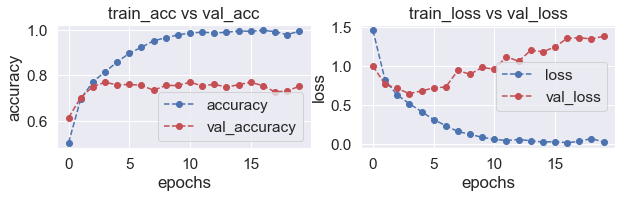

In [21]:
plot_accuracy_loss(history)

In [22]:
test_loss = model.evaluate(test_images, test_labels)


94/94 [==============================] - 5s 49ms/step - loss: 1.3684 - accuracy: 0.7507


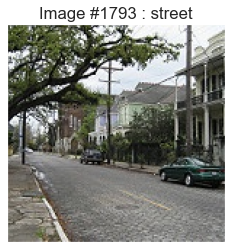

In [27]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [28]:
# Error analysis
# We can try to understand on which kind of images the classifier has trouble.

def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels) 
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

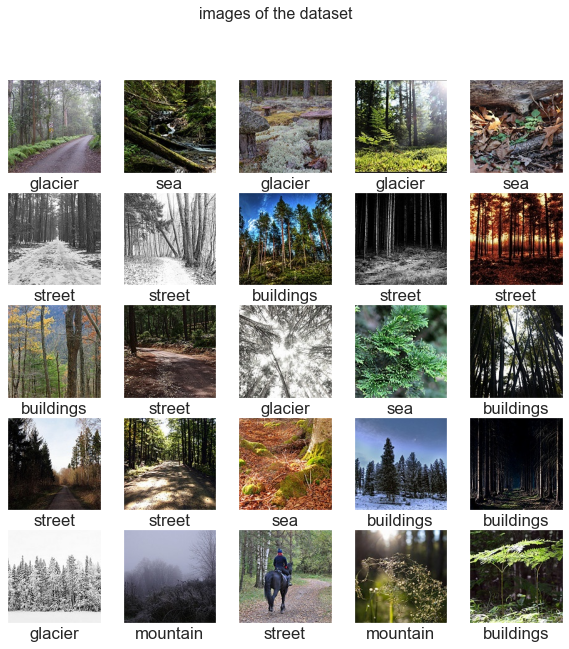

In [29]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)


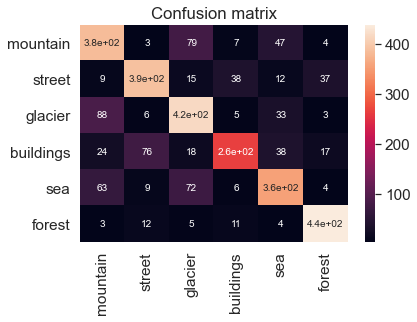

In [30]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [31]:
# Conclusion: The classifier has trouble with 2 kinds of images.
# It has trouble with street and buildings. Well, it can be understandable as as there are buildings in the street. It has also trouble with sea, glacier and moutain as well. It is hard for me to fully distinguish them. However, it can detects forest very accurately!

In [32]:
# We can extract features from VGG16.
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [33]:
# Get the features directly from VGG16

train_features = model.predict(train_images) 
test_features = model.predict(test_images)  

## Visualize the features through PCA

In [34]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [35]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

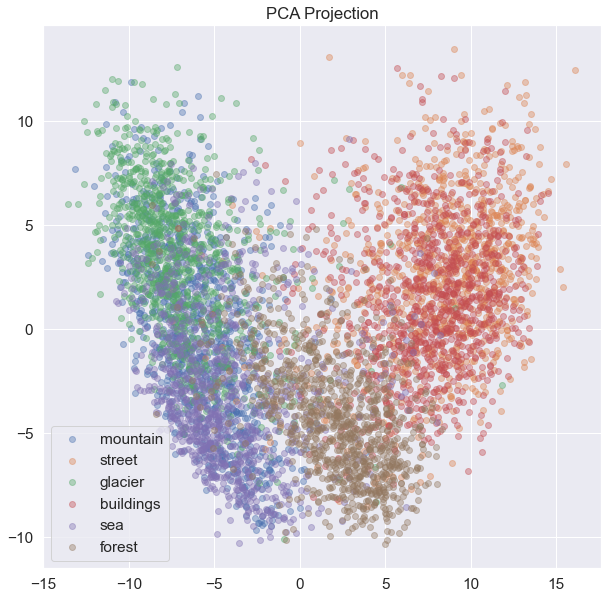

In [36]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

## Training on top of VGG

In [37]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
88/88 [==============================] - 1s 6ms/step - loss: 0.8073 - accuracy: 0.7048 - val_loss: 0.3843 - val_accuracy: 0.8603
Epoch 2/15
88/88 [==============================] - 0s 5ms/step - loss: 0.3133 - accuracy: 0.8917 - val_loss: 0.3299 - val_accuracy: 0.8792
Epoch 3/15
88/88 [==============================] - 1s 6ms/step - loss: 0.2481 - accuracy: 0.9132 - val_loss: 0.3538 - val_accuracy: 0.8739
Epoch 4/15
88/88 [==============================] - 0s 5ms/step - loss: 0.2010 - accuracy: 0.9303 - val_loss: 0.3344 - val_accuracy: 0.8771
Epoch 5/15
88/88 [==============================] - 0s 5ms/step - loss: 0.1693 - accuracy: 0.9405 - val_loss: 0.3309 - val_accuracy: 0.8817
Epoch 6/15
88/88 [==============================] - 0s 5ms/step - loss: 0.1505 - accuracy: 0.9567 - val_loss: 0.3232 - val_accuracy: 0.8860
Epoch 7/15
88/88 [==============================] - 0s 5ms/step - loss: 0.1156 - accuracy: 0.9655 - val_loss: 0.3394 - val_accuracy: 0.8871
Epoch 8/15
88/88 [==

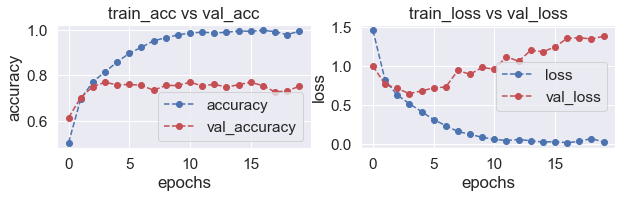

In [38]:
plot_accuracy_loss(history)

In [39]:
test_loss = model2.evaluate(test_features, test_labels)

94/94 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8770


## Ensemble Neural Networks

In [40]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [41]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [42]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
79/79 [==============================] - 1s 7ms/step - loss: 0.7996 - accuracy: 0.7029 - val_loss: 0.3426 - val_accuracy: 0.8851
Epoch 2/10
79/79 [==============================] - 0s 6ms/step - loss: 0.2570 - accuracy: 0.9143 - val_loss: 0.3067 - val_accuracy: 0.8931
Epoch 3/10
79/79 [==============================] - 0s 6ms/step - loss: 0.2015 - accuracy: 0.9321 - val_loss: 0.2608 - val_accuracy: 0.9145
Epoch 4/10
79/79 [==============================] - 0s 6ms/step - loss: 0.1440 - accuracy: 0.9544 - val_loss: 0.2546 - val_accuracy: 0.9190
Epoch 5/10
79/79 [==============================] - 0s 6ms/step - loss: 0.1046 - accuracy: 0.9719 - val_loss: 0.2732 - val_accuracy: 0.9110
Epoch 6/10
79/79 [==============================] - 0s 6ms/step - loss: 0.0855 - accuracy: 0.9796 - val_loss: 0.2537 - val_accuracy: 0.9216
Epoch 7/10
79/79 [==============================] - 0s 6ms/step - loss: 0.0768 - accuracy: 0.9766 - val_loss: 0.2481 - val_accuracy: 0.9279
Epoch 8/10
79/79 [==

79/79 [==============================] - 0s 6ms/step - loss: 0.0376 - accuracy: 0.9932 - val_loss: 0.2547 - val_accuracy: 0.9243
Epoch 10/10
79/79 [==============================] - 0s 6ms/step - loss: 0.0355 - accuracy: 0.9909 - val_loss: 0.2739 - val_accuracy: 0.9261
Epoch 1/10
79/79 [==============================] - 1s 8ms/step - loss: 0.8720 - accuracy: 0.6874 - val_loss: 0.3249 - val_accuracy: 0.8931
Epoch 2/10
79/79 [==============================] - 0s 6ms/step - loss: 0.2591 - accuracy: 0.9115 - val_loss: 0.2886 - val_accuracy: 0.9092
Epoch 3/10
79/79 [==============================] - 0s 6ms/step - loss: 0.1797 - accuracy: 0.9452 - val_loss: 0.2491 - val_accuracy: 0.9270
Epoch 4/10
79/79 [==============================] - 0s 5ms/step - loss: 0.1448 - accuracy: 0.9586 - val_loss: 0.2282 - val_accuracy: 0.9297
Epoch 5/10
79/79 [==============================] - 1s 9ms/step - loss: 0.1047 - accuracy: 0.9723 - val_loss: 0.2308 - val_accuracy: 0.9261
Epoch 6/10
79/79 [============

In [43]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [44]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.8826666666666667


## Fine Tuning VGG ImageNet

In [45]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [46]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [47]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [48]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
new_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 9, 9, 512)]       0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0   

In [51]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
88/88 [==============================] - 172s 2s/step - loss: 0.0575 - accuracy: 0.9814 - val_loss: 0.5488 - val_accuracy: 0.8903
Epoch 2/10
88/88 [==============================] - 172s 2s/step - loss: 0.0519 - accuracy: 0.9831 - val_loss: 0.4434 - val_accuracy: 0.9059
Epoch 3/10
88/88 [==============================] - 188s 2s/step - loss: 0.0494 - accuracy: 0.9833 - val_loss: 0.5824 - val_accuracy: 0.8803
Epoch 4/10
88/88 [==============================] - 181s 2s/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.5051 - val_accuracy: 0.8981
Epoch 5/10
88/88 [==============================] - 177s 2s/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.5359 - val_accuracy: 0.9052
Epoch 6/10
88/88 [==============================] - 175s 2s/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.5710 - val_accuracy: 0.8846
Epoch 7/10
88/88 [==============================] - 170s 2s/step - loss: 0.0668 - accuracy: 0.9792 - val_loss: 0.5310 - val_accuracy: 0.8953
Epoch 8/10
88


yj
h
h









































#### plot_accuracy_loss(history)

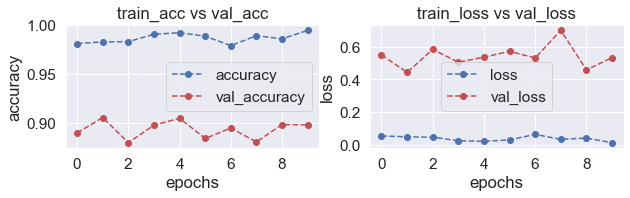

In [53]:
plot_accuracy_loss(history)

In [54]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.899
